<a href="https://colab.research.google.com/github/southeastwind13/deep_learning/blob/main/5_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_dataset = torchvision.datasets.MNIST(
    root='.',                                 # File part of the saving directory
    train=True,                               # Choose test data
    transform=transforms.ToTensor(),          # Torch prepocessing data
    download=True                             # Download
)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 28019621.99it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1077317.14it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 9394651.37it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 7055751.40it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [ ]:
train_dataset.data  # Most of the data are zero because it is a white background in the picture

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [ ]:
train_dataset.data.max() # Max = 255 the black color in the picuture

tensor(255, dtype=torch.uint8)

In [ ]:
train_dataset.data.shape # 60,000 sample with image size 28x28

torch.Size([60000, 28, 28])

In [ ]:
train_dataset.targets # Target is integer between 0 to 9

tensor([5, 0, 4,  ..., 5, 6, 8])

In [ ]:
test_dataset = torchvision.datasets.MNIST(
    root='.',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

In [ ]:
test_dataset.data.shape # Test data with 60,000 sample with image size 28x28

torch.Size([10000, 28, 28])

In [ ]:
# Build model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10)
)

# No need for Softmax because we will use the combind loss with softmax

In [ ]:
# - We will use GPU for the calculation
# - We have to move everything to the GPU to do the calculation (Model, Data, etc.)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
model.to(device)

cpu


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [ ]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [ ]:
# Data Loader
# Useful because
# 1. It automatically generates batches in the trainig loop.
# 2. It takes care of shuffering

batch_size = 128
train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True
)

test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

# We need to shuffle train data to reduce the correlation when we go through
# same order each time. The correclation will reduce the performance.

# Test data just use for the evaluation so we don't have to shuffle it.

In [ ]:
# Test data loader
# The data loader help to do
# - Map the value to (0, 1)
# -- Actually, we send the normalization in the MNIST function above (section 2)
# -- The normalize isn't get call when we get an attribute directly.
# -- It get call by data loader when we access the data via data loader.
# - Make the data of shape (batch size, color, height, width)

tmp_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=1,
    shuffle=False
)

for x, y in tmp_loader:
    print(x)
    print(x.shape)
    print(y.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
# We can call transfom function manually with out data loader and use can see
# The max of data change from 255 to 1

train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [ ]:
# Train the model
n_epochs = 10

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for epoch in range(n_epochs):
  train_loss = []

  for inputs, targets in train_loader:

    # move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # reshape input
    inputs = inputs.reshape(-1, 28*28)

    # zero the accumulate gradient
    optimizer.zero_grad()

    # forward pass
    outputs = model(inputs)

    # calculate loss
    loss = criterion(outputs, targets)

    # backward pass
    loss.backward()

    # update weights
    optimizer.step()

    train_loss.append(loss.item())

  # Get train loss and test loss
  train_loss = np.mean(train_loss)

  test_loss = []
  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.reshape(-1, 28*28)
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())
  test_loss = np.mean(test_loss)

  # Store loss
  train_losses[epoch] = train_loss
  test_losses[epoch] = test_loss

  print(f'Epoch {epoch+1}/{n_epochs}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

Epoch 1/10, Train Loss: 0.4181, Test Loss: 0.2260
Epoch 2/10, Train Loss: 0.1977, Test Loss: 0.1600
Epoch 3/10, Train Loss: 0.1425, Test Loss: 0.1295
Epoch 4/10, Train Loss: 0.1104, Test Loss: 0.1059
Epoch 5/10, Train Loss: 0.0882, Test Loss: 0.0952
Epoch 6/10, Train Loss: 0.0736, Test Loss: 0.0855
Epoch 7/10, Train Loss: 0.0613, Test Loss: 0.0811
Epoch 8/10, Train Loss: 0.0518, Test Loss: 0.0772
Epoch 9/10, Train Loss: 0.0434, Test Loss: 0.0749
Epoch 10/10, Train Loss: 0.0373, Test Loss: 0.0742


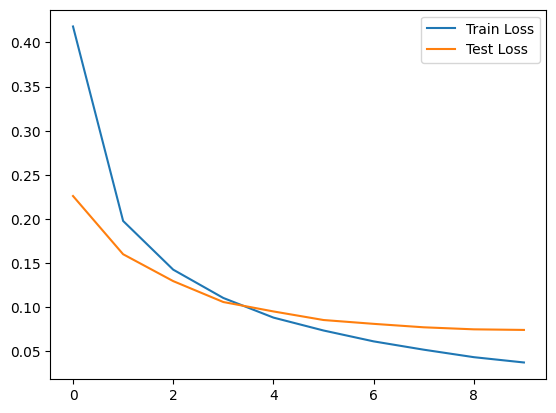

In [ ]:
# Plot the train loss and test loss per iteration
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluation the train accuracy

n_correct = 0
n_total = 0

print_once = 1

for inputs, targets in train_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape input
  inputs = inputs.reshape(-1, 28*28)

  # forward pass
  outputs = model(inputs)

  if print_once == 1:
    a, b = torch.max(outputs, 1)
    print('*'*50)
    print(outputs[0])
    print('*'*50)
    print(a)
    print('*'*50)
    print(b)
    print('*'*50)
    print_once = 0

  _, predictions = torch.max(outputs, 1) # (Maximum Value, Index (It coresponse to the clasee))

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

train_acc = n_correct / n_total
print(f'Train acc: {train_acc:.4f}')

**************************************************
tensor([ -7.0364, -16.5648,  -3.1661,   3.3595, -13.6759, -11.2955, -29.4694,
         16.2632,  -6.1014,   2.3152], grad_fn=<SelectBackward0>)
**************************************************
tensor([16.2632, 12.4344, 10.3326, 11.7948,  7.1742, 14.6290, 16.9576, 11.8144,
         7.3896,  6.0228, 14.4419, 14.0851,  4.8359, 10.3130,  5.6197,  9.5305,
         8.4558,  8.8497,  1.9041, 14.8931, 11.2142,  9.7204,  2.8526,  7.6990,
         8.0742, 11.2391,  6.7515, 11.0574,  9.4354, 12.6961, 10.9082, 10.6529,
        15.5150, 15.2335, 12.6974,  8.2296,  9.3120, 10.8585, 10.9872,  7.3130,
         5.4299, 14.7079,  4.3911,  4.4973,  4.2108, 11.8131,  5.8869,  9.5586,
         7.0814, 13.2453, 11.9453, 10.9018, 11.2476,  8.1692, 12.1447, 12.1279,
         6.5402, 11.5693,  7.7665,  8.4436, 15.8192,  4.2829, 14.2440,  6.8780,
        13.6614, 11.0323,  8.3109, 10.0133,  6.3361,  7.6751,  6.7515,  8.5680,
         8.0725,  8.9106, 13.7282,

In [ ]:
# Evaluate the test accuracy
# Evaluation the train accuracy

n_correct = 0
n_total = 0

for inputs, targets in test_loader:
  # move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # reshape input
  inputs = inputs.reshape(-1, 28*28)

  # forward pass
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)

  # update counts
  n_correct += (predictions == targets).sum().item()
  n_total += targets.shape[0]

test_acc = n_correct / n_total
print(f'Test acc: {test_acc:.4f}')

Test acc: 0.9767


In [ ]:
from types import FrameType
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 964    0    2    1    1    1    6    1    1    3]
 [   0 1121    4    1    0    0    2    1    6    0]
 [   1    0 1014    4    1    0    2    4    5    1]
 [   0    0    5  990    0    3    0    4    3    5]
 [   2    0    4    0  949    0    7    3    2   15]
 [   2    0    0   10    1  866    4    1    5    3]
 [   2    3    3    1    1    6  939    0    3    0]
 [   1    2   15    0    0    0    0 1002    2    6]
 [   2    0    6    5    2    3    1    4  948    3]
 [   1    3    1    8    6    2    1    6    4  977]]


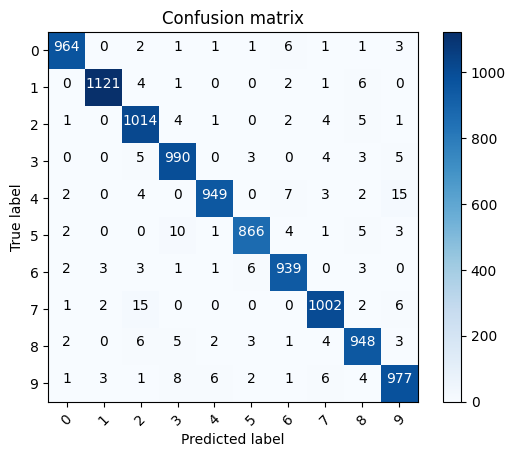

In [ ]:
# Get all predicstions in an array and plot confusion matrix
x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for input, target in test_loader:

  # move data to GPU
  input, target = input.to(device), target.to(device)

  # reshape the input
  input = input.reshape(-1, 28*28)

  # Forward pass
  outputs = model(input)
  _, predictions = torch.max(outputs, 1)

  # Store predictions
  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True label: 7, Predicted: 2')

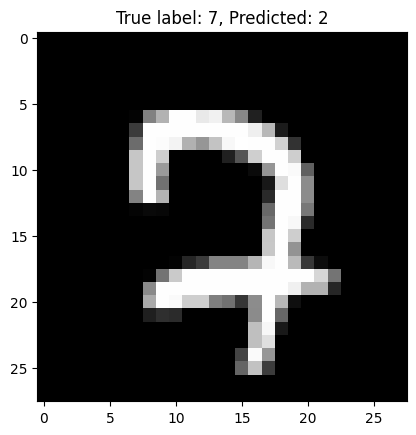

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %d, Predicted: %d" % (y_test[i], p_test[i]))